Decision Tree Test Accuracy: 1.0000
Decision Tree Test Error: 0.0000

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Class-specific Specificity:
setosa: 1.0000
versicolor: 1.0000
virginica: 1.0000

AUC Score (OvR): 1.0000

Cross-Validation Results:
CV Accuracy: 0.9733
CV Error: 0.0267


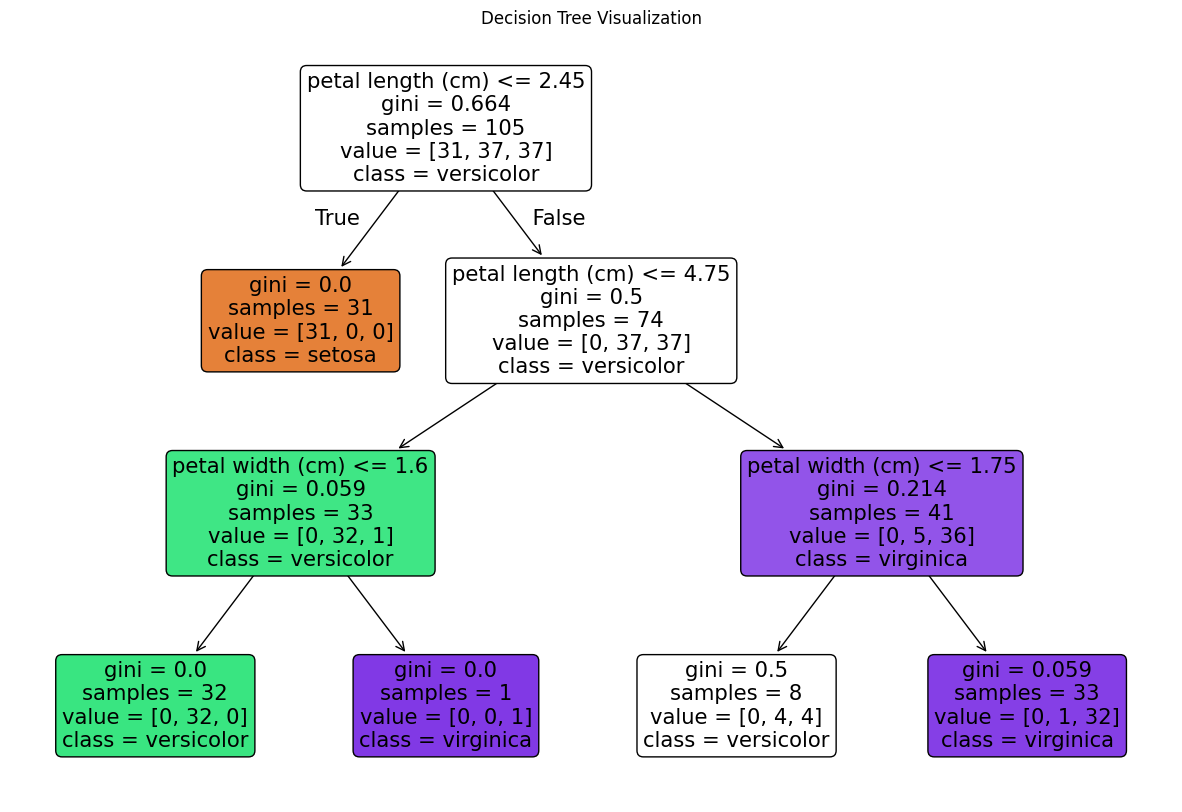

In [2]:
# Decision Tree Classifier (Q9) - With CV Error Display
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (classification_report, confusion_matrix,
                           roc_auc_score, accuracy_score)
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Evaluate
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
error = 1 - accuracy

print(f"Decision Tree Test Accuracy: {accuracy:.4f}")
print(f"Decision Tree Test Error: {error:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Calculate Specificity for each class
def calculate_specificity(cm):
    specificities = []
    for i in range(cm.shape[0]):
        tn = np.sum(cm) - (np.sum(cm[i,:]) + np.sum(cm[:,i]) - cm[i,i])
        fp = np.sum(cm[:,i]) - cm[i,i]
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificities.append(specificity)
    return specificities

specificities = calculate_specificity(cm)
print("\nClass-specific Specificity:")
for i, name in enumerate(data.target_names):
    print(f"{name}: {specificities[i]:.4f}")

# Calculate AUC Score (Multiclass)
y_prob = dt.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"\nAUC Score (OvR): {auc_score:.4f}")

# Cross-Validation
cv_accuracy = cross_val_score(dt, X, y, cv=5)
cv_error = 1 - cv_accuracy  # Calculate CV error from accuracy

print("\nCross-Validation Results:")
print(f"CV Accuracy: {np.mean(cv_accuracy):.4f}")
print(f"CV Error: {np.mean(cv_error):.4f}")

# Visualize Tree
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=data.feature_names,
          class_names=data.target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()